In [35]:
import nltk
import pandas as pd
import pickle

pd.set_option("display.max_columns", None)
from collections import Counter
import spacy
import google_conf
import math
import matplotlib
import matplotlib.pyplot as plt
import json

In [36]:
mops_data = google_conf.setup(
    sheet_url="https://docs.google.com/spreadsheets/d/1VbCIAJssHKV9hlRTwzVFfm40CGnHesq53KXjv2qy4OM/edit?usp=sharing",
    service_account_path="../../ServiceAccountsKey.json")

In [37]:
metadata_df = pd.read_json("../data/metadata_rich_df.json")

In [40]:
article_id = 1203  # id for "Paul the Cosmopolitan?"
with open("../data/large_files/unigrams_lemmatized/unigrams_lemmata_id_{}.txt".format(str(article_id)), "r") as f:
    unigrams_lemmata = [el.strip() for el in f.readlines()]

In [42]:
nltk.FreqDist(unigrams_lemmata).most_common(20)

[('cosmopolitan', 89),
 ('Paul', 78),
 ('cosmopolitanism', 71),
 ('cynic', 41),
 ('vision', 33),
 ('people', 33),
 ('social', 33),
 ('human', 31),
 ('new', 30),
 ('think', 29),
 ('view', 26),
 ('see', 25),
 ('Pauls', 25),
 ('cor', 24),
 ('world', 23),
 ('God', 23),
 ('group', 21),
 ('jewish', 20),
 ('western', 19),
 ('Rom', 19)]

In [44]:
with open("../data/large_files/trigrams_lemmatized/trigrams_lemmata_id_{}.txt".format(str(article_id)), "r") as f:
    trigrams_lemmata = [el.strip() for el in f.readlines()]
nltk.FreqDist(trigrams_lemmata).most_common(20)

[('Paul Cosmopolitan', 12),
 ('civic life', 9),
 ('religious group', 8),
 ('greek Roman', 7),
 ('Delanty Cosmopolitan Imagination', 7),
 ('high loyalty', 6),
 ('apocalyptic vision', 6),
 ('God Israel', 5),
 ('take place', 5),
 ('apostle Paul', 5),
 ('Pauls theology', 5),
 ('Pauls letter', 5),
 ('family friend', 5),
 ('social environment', 4),
 ('civic deity', 4),
 ('various way', 4),
 ('Pauls view', 4),
 ('cynic Paul', 4),
 ('point see', 4),
 ('jewish sectarian', 4)]

In [45]:
ids = metadata_df[metadata_df["decade"]==1930]["id_kase"]

In [46]:
metadata_df["wordCount"].sum()

232665684

In [47]:
def freqs_from_ids(ids):
    metadata_subset = metadata_df[metadata_df["id_kase"].isin(ids)]
    wordcount = metadata_subset["wordCount"].sum()
    unigrams_lemmata = []
    for id in ids:
        with open("../data/large_files/unigrams_lemmatized/unigrams_lemmata_id_{}.txt".format(str(id)), "r") as f:
            unigrams_lemmata.extend([el.strip() for el in f.readlines()])
    unigrams_lemmata_counts = nltk.FreqDist(unigrams_lemmata)
    unigrams_lemmata_freqs = [(tup[0], tup[1] / wordcount) for tup in unigrams_lemmata_counts.most_common()]
    return unigrams_lemmata_counts, unigrams_lemmata_freqs, wordcount


In [48]:
ids = metadata_df[metadata_df["decade"]==1930]["id_kase"]
len(ids)

425

In [49]:
ids = metadata_df[metadata_df["decade"]==1930].sample(300, replace=True)["id_kase"]
unigrams_lemmata_counts, unigrams_lemmata_freqs, wordcount = freqs_from_ids(ids)
unigrams_lemmata_freqs[:20]


[('new', 0.002272129462015877),
 ('man', 0.002188211583064949),
 ('church', 0.0020852535130915415),
 ('Paul', 0.002055635438167685),
 ('work', 0.0020309537090644706),
 ('God', 0.0019576137140149205),
 ('make', 0.0019272904468309719),
 ('christian', 0.0018165752619965544),
 ('time', 0.0017566339198887488),
 ('et', 0.0017347729598259022),
 ('book', 0.0016663693105969945),
 ('st', 0.0016572018112158008),
 ('life', 0.0015542437412423937),
 ('cf', 0.0015352035502199143),
 ('say', 0.0015232152817983532),
 ('find', 0.0014893660533139453),
 ('die', 0.0014689154777712823),
 ('give', 0.0014442337486680681),
 ('letter', 0.001432245480246507),
 ('see', 0.001420257211824946)]

In [50]:
ids = metadata_df[metadata_df["decade"]==1990].sample(300, replace=True)["id_kase"]
unigrams_lemmata_counts, unigrams_lemmata_freqs, wordcount = freqs_from_ids(ids)
unigrams_lemmata_freqs[:20]

[('group', 0.003543297718876066),
 ('selection', 0.0030460423026031098),
 ('new', 0.0020958932671294003),
 ('God', 0.0020644367201145663),
 ('see', 0.00200918611830646),
 ('Paul', 0.0019208658132263488),
 ('individual', 0.0016421930698000615),
 ('human', 0.0016244483509711806),
 ('make', 0.0015946049602135173),
 ('work', 0.0014163511937961236),
 ('university', 0.0014090919906388543),
 ('church', 0.001350615076316406),
 ('study', 0.001333273646551818),
 ('christian', 0.0013147223495943517),
 ('use', 0.00127479673222937),
 ('press', 0.0012626980603005875),
 ('social', 0.001206237591299603),
 ('text', 0.0011723613098990123),
 ('level', 0.0011437277863342275),
 ('book', 0.0011243699112481757)]

In [51]:
decades_sample_freqs = []
sample_size = 500
for decade in range(1900, 2020, 10):
    ids = metadata_df[metadata_df["decade"]==decade].sample(sample_size, replace=True)["id_kase"]
    unigrams_lemmata_counts, unigrams_lemmata_freqs, wordcount = freqs_from_ids(ids)
    decades_freqs_dict = dict(unigrams_lemmata_freqs)
    decades_sample_freqs.append({"decade" : decade, "freqs" : decades_freqs_dict})

In [52]:
decades_sample_freqs

[{'decade': 1900,
  'freqs': {'new': 0.003477748333953175,
   'man': 0.003083024140807296,
   'God': 0.0029563045658859252,
   'et': 0.0029164922856424295,
   'see': 0.0028747379429480313,
   'Jesus': 0.00282570086606275,
   'der': 0.0027504459460902884,
   'die': 0.002648487667417921,
   'book': 0.0026280960116834475,
   'Paul': 0.002568377591318204,
   'life': 0.0024028167673787884,
   'Christ': 0.0023853382053206683,
   'make': 0.002350381081204428,
   'ii': 0.0022605606928502,
   'testament': 0.002241625583953903,
   'time': 0.0021590879297905584,
   'say': 0.002116848071483435,
   'church': 0.002080434400529018,
   'gospel': 0.0019367217791622525,
   'christian': 0.0018643799528661443,
   'give': 0.0018580682499007121,
   'work': 0.001845930359582573,
   'find': 0.0016565792706196053,
   'great': 0.0016352165836596808,
   'proc': 0.0016303614275324251,
   'st': 0.0016235642089542674,
   'history': 0.001611911834248854,
   'word': 0.0016104552874106773,
   'und': 0.0015939477565780

In [72]:
keyterms = ["Paul", "apostle", "saint", "social", "soul", "theology", "science", "group", "church", "community", "gender", "psychology", "sociology", "anthropology", "jewish", "judaism"]
keywords_freqs = []
for decade_data in decades_sample_freqs:
    decade_vals = {}
    for word in keyterms:
        try:
            decade_vals[word] = decade_data["freqs"][word]
        except:
            decade_vals[word] = 0
    keywords_freqs.append(decade_vals)

In [73]:
keywords_freqs

[{'Paul': 0.002568377591318204,
  'apostle': 0.0007389547625683,
  'saint': 0.00043356544216392365,
  'social': 0.0002883962739589817,
  'soul': 0.0005714518761779822,
  'theology': 0.0008190648386680171,
  'science': 0.0004995955654945996,
  'group': 0.00018061180793390772,
  'church': 0.002080434400529018,
  'community': 0.00013885746523950972,
  'gender': 5.826187352706701e-06,
  'psychology': 9.079141957967942e-05,
  'sociology': 2.2819233798101247e-05,
  'anthropology': 6.311702965432259e-06,
  'jewish': 0.0008229489635698215,
  'judaism': 0.0002680046182245082},
 {'Paul': 0.0036231449665620405,
  'apostle': 0.0008848050911061502,
  'saint': 0.00041602624202416547,
  'social': 0.000703767735066816,
  'soul': 0.0005263271476905148,
  'theology': 0.000823660023834587,
  'science': 0.0005982625209511775,
  'group': 0.00032430864111682064,
  'church': 0.003005100217964181,
  'community': 0.00036567148074170163,
  'gender': 7.792998769905118e-06,
  'psychology': 0.0001258869032061596,


In [74]:
keywords_freqs_df = pd.DataFrame(keywords_freqs, index=range(1900, 2020, 10))
keywords_freqs_df

,Paul,apostle,saint,social,soul,theology,science,group,church,community,gender,psychology,sociology,anthropology,jewish,judaism
1900,0.002568,0.000739,0.000434,0.000288,0.000571,0.000819,0.000500,0.000181,0.002080,0.000139,0.000006,0.000091,0.000023,0.000006,0.000823,0.000268
1910,0.003623,0.000885,0.000416,0.000704,0.000526,0.000824,0.000598,0.000324,0.003005,0.000366,0.000008,0.000126,0.000102,0.000011,0.000930,0.000323
1920,0.002879,0.000386,0.000350,0.000671,0.000430,0.000580,0.000819,0.000429,0.001951,0.000313,0.000010,0.000191,0.000048,0.000022,0.000782,0.000211
1930,0.002129,0.000318,0.000450,0.000983,0.000326,0.000457,0.000432,0.000605,0.003104,0.000282,0.000005,0.000174,0.000023,0.000027,0.000661,0.000282
1940,0.002404,0.000442,0.000421,0.000606,0.000427,0.000439,0.000266,0.000594,0.002584,0.000289,0.000003,0.000060,0.000026,0.000020,0.000518,0.000183
1950,0.001840,0.000282,0.000263,0.000280,0.000240,0.000559,0.000199,0.000283,0.002023,0.000269,0.000001,0.000055,0.000017,0.000027,0.000236,0.000065
1960,0.001645,0.000245,0.000249,0.000510,0.000276,0.000870,0.000275,0.000312,0.002419,0.000399,0.000004,0.000093,0.000038,0.000021,0.000323,0.000146
1970,0.002391,0.000251,0.000387,0.000425,0.000314,0.000632,0.000147,0.000391,0.002383,0.000392,0.000009,0.000033,0.000028,0.000037,0.000503,0.000233
1980,0.002452,0.000234,0.000264,0.000993,0.000185,0.000940,0.000264,0.000438,0.002416,0.000623,0.000030,0.000075,0.000044,0.000069,0.000712,0.000351
1990,0.002555,0.000211,0.000286,0.000988,0.000275,0.000918,0.000306,0.001126,0.001628,0.000696,0.000173,0.000067,0.000039,0.000081,0.000527,0.000239


In [75]:
"Paul", "church",

('Paul', 'church')

In [76]:
4 / 1000

0.004

<Axes: >

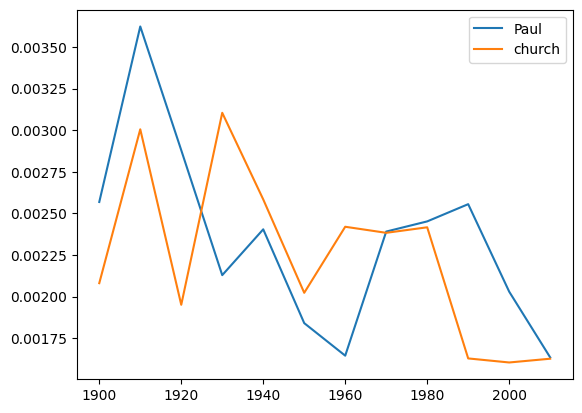

In [77]:
keywords_freqs_df[["Paul", "church"]].plot()

<Axes: >

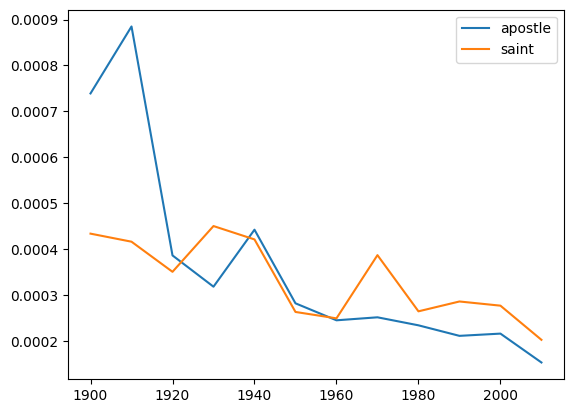

In [78]:
keywords_freqs_df[["apostle", "saint"]].plot()

<Axes: >

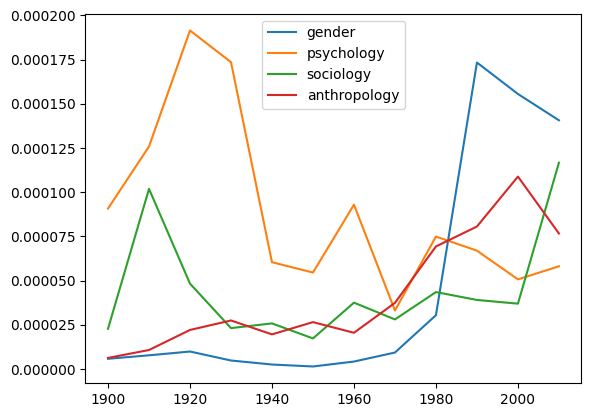

In [79]:
keywords_freqs_df[["gender", "psychology", "sociology", "anthropology"]].plot()

<Axes: >

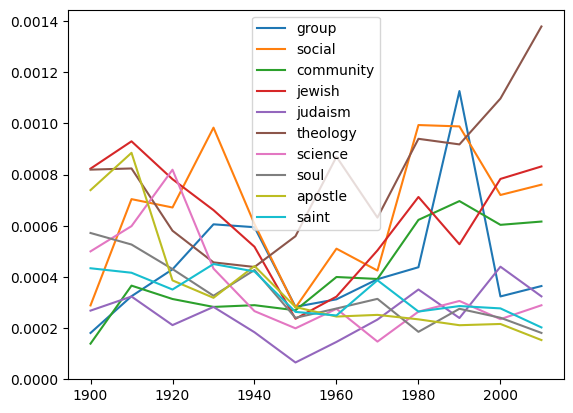

In [80]:
keywords_freqs_df[["group", "social", "community", "jewish", "judaism","theology", "science", "soul", "apostle", "saint"]].plot()

# Building vocabularies

In [23]:
bidecades = [(1900,1919), (1920,1939), (1940,1959), (1960,1979), (1980,1999), (2000,2019)]
N = 3000
bidecades_vocabs = []
for bidecade in bidecades:
    ids = metadata_df[metadata_df["year"].between(bidecade[0], bidecade[1])]["id_kase"]
    unigrams_lemmata_counts, unigrams_lemmata_freqs, wordcount = freqs_from_ids(ids)
    bidecade_vocab_N = [tup[0] for tup in unigrams_lemmata_counts.most_common()][:N]
    bidecades_vocabs.append(bidecade_vocab_N)

In [24]:
vocabulary = list(set([w for vocab in bidecades_vocabs for w in vocab]))
len(vocabulary)

4804

In [30]:
bidecades = [(1900,1919), (1920,1939), (1940,1959), (1960,1979), (1980,1999), (2000,2019)]
N = 3000
bidecades_vocabs_counts = []
for bidecade in bidecades:
    ids = metadata_df[metadata_df["year"].between(bidecade[0], bidecade[1])]["id_kase"]
    unigrams_lemmata_counts, unigrams_lemmata_freqs, wordcount = freqs_from_ids(ids)
    bidecade_vocab_N = dict(unigrams_lemmata_counts.most_common()[:N])
    bidecades_vocabs_counts.append(bidecade_vocab_N)

In [31]:
bidecades_strs = sorted([el for el in list(set(metadata_df["bidecade"])) if el != None])
bidecades_vocabs_counts_df = pd.DataFrame(bidecades_vocabs_counts).T
bidecades_vocabs_counts_df.columns = bidecades_strs

In [32]:
bidecades_vocabs_counts_df.shape

(4804, 6)

In [33]:
bidecades_vocabs_counts_df.head(10)

,1900-1919,1920-1939,1940-1959,1960-1979,1980-1999,2000-2019
man,11218.0,8342.0,24108.0,39199.0,48435.0,100670.0
new,10183.0,10192.0,23469.0,42092.0,97421.0,293457.0
Jesus,9650.0,4911.0,12134.0,23416.0,49765.0,215687.0
et,9325.0,11818.0,20805.0,35969.0,49326.0,73464.0
God,9248.0,6276.0,26328.0,45751.0,99505.0,293240.0
Paul,8660.0,7217.0,19803.0,36061.0,100083.0,224979.0
make,8094.0,8035.0,18269.0,27811.0,63486.0,206015.0
church,8091.0,7319.0,23104.0,39397.0,74688.0,214495.0
life,7543.0,6423.0,15075.0,22026.0,49869.0,148808.0
see,7388.0,6783.0,18801.0,34552.0,97771.0,233655.0


In [147]:
len(bidecades_vocabs)

6

In [150]:
shared_vocabulary = list((set(bidecades_vocabs[0])
                          & set(bidecades_vocabs[1])
                          & set(bidecades_vocabs[2])
                          & set(bidecades_vocabs[3])
                          & set(bidecades_vocabs[4])
                          & set(bidecades_vocabs[5])))
len(shared_vocabulary)

1868

In [158]:
pickle.dump(bidecades_vocabs_counts_df, open("../data/bidecades_vocabs_counts_df.pickle", "wb"))
pickle.dump(vocabulary, open("../data/vocabulary.pickle", "wb"))
pickle.dump(shared_vocabulary, open("../data/shared_vocabulary.pickle", "wb"))
pickle.dump(bidecades_vocabs, open("../data/bidecades_vocabs.pickle", "wb"))